# ( Flight Dataset)
## by (Osama Elsayed)

## Preliminary Wrangling

> *This dataset shows observations held from June 2003 to April 2020 of different Airflights, different carrierIDs, Airplanes and showing total number of delayed flights per observation or cancelled flights. Furthermore, it shows all the reasons and variables affecting delay possibility either as total number of delayed flights, or total duration of delay per observation

### What is the structure of your dataset?

> #### Before you start exploring this dataset, you need to be familiar wiht abbreviations used
**year**                = "Year (yyyy)", \
**month**               = "Month (mm)",   \
**carrier**             = "Airline carrier abbreviation", \
**carrier_name**        = "Airline carrier name", \
**airport**             = "Airport Code", \
**airport_name**        = "Airport Name", \
**arr_flights**         = "Total number of arriving flights in the observation",  \
**arr_del15**           = "Total number of delayed flights in the observation",   \
**carrier_ct**          = "Number of flights delayed due to air carrier (subset of arr_del15)",   \
**weather_ct**          = "Number of flights delayed due to weather (subset of arr_del15)",   \
**nas_ct**              = "Number of flights delayed due to National Aviation System (subset of arr_del15)",  \
**security_ct**         = "Number of flights delayed due to airport security (subset of arr_del15)",  \
**late_aircraft_ct**    = "Number of flights delayed due to a previous flight using the same aircraft being late",    \
**arr_cancelled**       = "Number of cancelled flights",  \
**arr_diverted**        = "Number of flights diverted",   \
**arr_delay**           = "Arrival delay in minutes", \
**carrier_delay**       = "Carrier delay in minutes (subset of arr_delay)",   \
**weather_delay**       = "Weather delayed in minutes (subset of arr_delay)", \
**nas_delay**           = "National Aviation System in minutes (subset of arr_delay)",    
**security_delay**      = "Security delay in minutes (subset of arr_delay)",  
**late_aircraft_delay** = "Aircraft delay in minutes (subset of arr_delay)" 

### What is/are the main feature(s) of interest in your dataset?

> The main purpose of this project is analysing "Delay" Features in the Dataset, and how it is related to carrierIDs that have subset Airlines, in other words, to show how carrierIDs that have different subset Airlines act in different ways to Delay reasons, although they all are belonging to the same superior carrierID

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Main reasons of Delay either as affecting total number of flights or the duration of delay

## Questions to be Answered
**Q1:** Based on that this dataset is representative of the population covering delayed flights all over the year?\
**Q2:** If you are travelling to USA soon, What is the possbility that your flight is going to be delayed, given that you don't have not booked your Airline Plane yet? And what is the estimated average time of delay? \
**Q3:** If your flight was delayed, roughly what could the possible reason for the delay be? Also does the total duration of delay follows the same pattern? \
**Q4:** If you were to book your flight through a carrierID that has more than one Airline, Do you think that the sub-Airlines would have the same characteristics since they have the same superior carrierID? If not, can you elaporate the reasons?  \
**Q5:** which season of the year do you think that weather highly affects the flights delay? \
**Q6:** If you were to choose one of the previously mentioned carrierIDS that have subsets, Do they all have the same possibilites for delay rather than carrier characteristics?And illustrate the relationship between the most two affecting fators delayed duration on the total number of flights delayed. \


## 1- Loading Dataset and Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the dataset
df = pd.read_csv('472368625_42020_3717_airline_delay_causes.csv')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2004,1,DL,Delta Air Lines Inc.,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",650.0,126.0,21.06,6.44,...,45.92,4.0,0.0,5425.0,881.0,397.0,2016.0,15.0,2116.0,NaN
1,2004,1,DL,Delta Air Lines Inc.,PDX,"Portland, OR: Portland International",314.0,61.0,14.09,2.61,...,10.05,30.0,3.0,2801.0,478.0,239.0,1365.0,0.0,719.0,NaN
2,2004,1,DL,Delta Air Lines Inc.,PHL,"Philadelphia, PA: Philadelphia International",513.0,97.0,27.60,0.42,...,17.12,15.0,0.0,4261.0,1150.0,16.0,2286.0,0.0,809.0,NaN
3,2004,1,DL,Delta Air Lines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",334.0,78.0,20.14,2.02,...,16.45,3.0,1.0,3400.0,1159.0,166.0,1295.0,0.0,780.0,NaN
4,2004,1,DL,Delta Air Lines Inc.,PIT,"Pittsburgh, PA: Pittsburgh International",217.0,47.0,8.08,0.44,...,16.59,4.0,1.0,1737.0,350.0,28.0,522.0,0.0,837.0,NaN


## 2- Data Wrangling

In [3]:
#using dtypes, we can easily find out that all data are given in the correct type
#all data are quanitative except for 4 qualitative data which are strings
df.dtypes

year                     int64
 month                   int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
 weather_ct            float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
 arr_delay             float64
 carrier_delay         float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
Unnamed: 21            float64
dtype: object

In [4]:
#loading names of columns, so I can find out if some variables are unknown for me or have mistakes
#we notice that we need to do stripping for column names
df.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed: 21'],
      dtype='object')

In [5]:
# finding out the missing data
# we can see that all quanitative data have some missing values
#max number of missing data is in arr_del15, but since there is a relationship between it and its subsets
#then we can fill the missing values of it using summation or substraction only if one value is missing
#other missing data will be dropped since they don't have any information around 400 rows (0.1%)
#There is also one unnamed column that needs to be dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280833 entries, 0 to 280832
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 280833 non-null  int64  
 1    month               280833 non-null  int64  
 2   carrier              280833 non-null  object 
 3   carrier_name         280833 non-null  object 
 4   airport              280833 non-null  object 
 5   airport_name         280833 non-null  object 
 6   arr_flights          280428 non-null  float64
 7   arr_del15            280233 non-null  float64
 8   carrier_ct           280428 non-null  float64
 9    weather_ct          280428 non-null  float64
 10  nas_ct               280428 non-null  float64
 11  security_ct          280428 non-null  float64
 12  late_aircraft_ct     280428 non-null  float64
 13  arr_cancelled        280428 non-null  float64
 14  arr_diverted         280428 non-null  float64
 15   arr_delay       

In [6]:
#we can see that sample was taken through 18 year, which is enough time for being representative
#of population, as well as it includes data of all months
#there is carrier_name more than carrier which may indicates writing mistakes or different subsets
#airport number is equal to airport_name so we can drop airport_name
df[['year',' month','carrier','carrier_name','airport','airport_name']].nunique()

year             18
 month           12
carrier          28
carrier_name     32
airport         409
airport_name    409
dtype: int64

In [7]:
#we look for names of carriers as per each carrier abbreviation
#we find out that some carriers has different airline categres subiside to it
df.groupby('carrier')['carrier_name'].nunique()

carrier
9E    2
AA    1
AQ    1
AS    1
B6    1
CO    1
DH    2
DL    1
EV    3
F9    1
FL    1
G4    1
HA    1
HP    1
MQ    2
NK    1
NW    1
OH    2
OO    1
RU    1
TZ    1
UA    1
US    1
VX    1
WN    1
XE    1
YV    1
YX    1
Name: carrier_name, dtype: int64

In [8]:
#we can find out from describe that there are outliers in almost all variables that need to be
#investigated further
#we can see that year 2003 and 2020 are present in the dataset, so we need to re-sort the dataset
#we can see there is negative values in nas that needs to be modified to be zero
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
count,280833.000000,280833.000000,280428.000000,280233.000000,280428.000000,280428.000000,280428.000000,280428.000000,280428.000000,280428.000000,280428.000000,280428.000000,280428.000000,280428.000000,280428.000000,280428.000000,280428.000000,0.0
mean,2011.297853,6.484548,395.304937,76.873559,21.563997,2.726918,25.766792,0.176691,26.585766,7.479036,0.903501,4399.287004,1299.462365,226.087106,1183.405184,6.988036,1683.343621,NaN
std,5.017028,3.461999,1052.930445,205.900465,47.474001,10.307767,89.262117,0.835067,78.106083,38.525822,4.033879,12871.612538,3449.655836,872.419051,4878.740306,37.192935,5073.416197,NaN
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000,NaN
25%,2007.000000,3.000000,60.000000,10.000000,3.470000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,497.000000,167.000000,0.000000,69.000000,0.000000,98.000000,NaN
50%,2011.000000,6.000000,124.000000,25.000000,8.840000,0.650000,6.140000,0.000000,6.610000,1.000000,0.000000,1304.000000,466.000000,28.000000,228.000000,0.000000,396.000000,NaN
75%,2016.000000,9.000000,283.000000,59.000000,20.420000,2.140000,16.610000,0.000000,18.380000,5.000000,1.000000,3243.000000,1133.000000,167.000000,652.000000,0.000000,1192.000000,NaN
max,2020.000000,12.000000,21977.000000,6377.000000,1792.070000,717.940000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3194.000000,148181.000000,NaN


In [9]:
#from correlation, we can see that delay is strongly related to its subcategories with different
#proportions that nees investigation
#Also there is a strong colleraltion between cancellation and delay time
#There is weak relationship between security delay in minutes and total delay minutes
df.corr()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
year,1.000000,-0.085104,-0.007680,-0.029751,-0.027778,-0.056285,-0.043391,-0.061458,-0.004651,0.023993,0.005937,-0.001281,0.019243,-0.020479,-0.028480,-0.035186,0.014832,NaN
month,-0.085104,1.000000,0.004435,0.000867,0.003971,-0.012349,0.000182,0.011350,0.001617,-0.047096,-0.004095,-0.002028,-0.001419,-0.014979,-0.000633,0.010917,-0.001075,NaN
arr_flights,-0.007680,0.004435,1.000000,0.922376,0.890084,0.611442,0.813584,0.476536,0.874243,0.495910,0.638536,0.882108,0.883473,0.625801,0.704065,0.427666,0.849459,NaN
arr_del15,-0.029751,0.000867,0.922376,1.000000,0.913474,0.666299,0.924558,0.487548,0.930376,0.511970,0.667859,0.975074,0.898082,0.683776,0.849016,0.432880,0.925974,NaN
carrier_ct,-0.027778,0.003971,0.890084,0.913474,1.000000,0.698154,0.751528,0.510354,0.843090,0.455352,0.594176,0.873795,0.943787,0.691121,0.651169,0.448258,0.826842,NaN
weather_ct,-0.056285,-0.012349,0.611442,0.666299,0.698154,1.000000,0.581039,0.337961,0.532038,0.395878,0.505699,0.663896,0.692445,0.939784,0.530613,0.297575,0.539485,NaN
nas_ct,-0.043391,0.000182,0.813584,0.924558,0.751528,0.581039,1.000000,0.386058,0.756136,0.477506,0.610391,0.913189,0.767899,0.595901,0.950948,0.356931,0.775148,NaN
security_ct,-0.061458,0.011350,0.476536,0.487548,0.510354,0.337961,0.386058,1.000000,0.478243,0.213627,0.308328,0.429970,0.426226,0.326701,0.317707,0.839335,0.433203,NaN
late_aircraft_ct,-0.004651,0.001617,0.874243,0.930376,0.843090,0.532038,0.756136,0.478243,1.000000,0.472049,0.631309,0.902751,0.819642,0.573448,0.681501,0.412245,0.976047,NaN
arr_cancelled,0.023993,-0.047096,0.495910,0.511970,0.455352,0.395878,0.477506,0.213627,0.472049,1.000000,0.376159,0.530370,0.481639,0.424303,0.475343,0.194044,0.486608,NaN


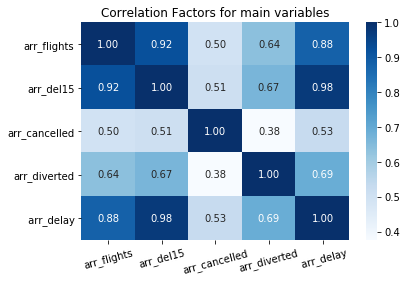

In [10]:
#plotting correlation factors among the major variables in the dataset
sns.heatmap(df[['arr_flights','arr_del15','arr_cancelled','arr_diverted',' arr_delay']].corr(),
            annot = True, cmap = 'Blues', fmt='.2f');
plt.xticks(rotation=15);
plt.title('Correlation Factors for main variables');
#we find out that the relationship between arrival delay in minutes has a not strong relationship
#with cancelled flights, also cancellation has weak relationship with diverted flights

## 3- Data Cleaning

In [11]:
#dropping last column in the dataset which is unnamed
df = df.iloc[:,:21]
#dropping a non-necessary column since each airport already has its own code
df.drop('airport_name',axis=1,inplace=True)
df.shape

(280833, 20)

In [12]:
#stripping coulmn names since some column names have space which would cuase problems in interpretation
df.rename(columns = lambda x: x.strip(), inplace=True)

In [13]:
#Removing values less than zero of NAS both total number and minutes and assuming it to be zero
df['nas_ct'].where(df['nas_ct']>=0,0, inplace=True)
df['nas_delay'].where(df['nas_delay']>=0,0, inplace=True)
df[['nas_ct','nas_delay']].describe()

,nas_ct,nas_delay
count,280833.000000,280833.000000
mean,25.729632,1181.698622
std,89.203089,4875.427929
min,0.000000,0.000000
25%,2.000000,68.000000
50%,6.120000,228.000000
75%,16.580000,651.000000
max,4091.270000,238440.000000


In [14]:
#There is no dublicated data
df.duplicated().sum()

0

In [15]:
#Whenever arr_flights is missing, then all other data are missing, so we drop those rows
null_df = df[df['arr_flights'].isnull()].index
df = df.drop(null_df,axis=0)
df.shape

(280428, 20)

In [16]:
#now we have few missing data from arr_del15, we fill it from other subcategories assunming all delay
#reasons are mentioned here
#we replace missing values with string nan, so I can use it in where condition
df.fillna('nan',inplace=True)
df['arr_del15'].where(df['arr_del15']!='nan', df['carrier_ct']+df['weather_ct']+df['nas_ct']+
                       df['security_ct']+df['late_aircraft_ct'], inplace = True)
#now there is no missing data
df['arr_del15'].isnull().sum()

0

In [17]:
#Re sorting the data since we have dataset starting form 2003 but not sorted
#and noting that we start from 2nd quarter and ends in 2020 1st quarter
df = df.sort_values(['year','month']).reset_index(drop=True)
df.head()

,year,month,carrier,carrier_name,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2003,6,AA,American Airlines Inc.,ABQ,307.0,56,14.68,10.79,19.09,1.48,9.96,1.0,1.0,2530.0,510.0,621.0,676.0,25.0,698.0
1,2003,6,AA,American Airlines Inc.,ANC,90.0,27,7.09,2.00,10.75,0.00,7.16,0.0,0.0,1390.0,271.0,83.0,581.0,0.0,455.0
2,2003,6,AA,American Airlines Inc.,ATL,752.0,186,33.99,27.82,104.76,1.90,17.53,5.0,0.0,8314.0,1367.0,1722.0,3817.0,139.0,1269.0
3,2003,6,AA,American Airlines Inc.,AUS,842.0,174,60.24,20.54,47.78,4.69,40.75,9.0,1.0,8344.0,3040.0,1032.0,1835.0,115.0,2322.0
4,2003,6,AA,American Airlines Inc.,BDL,383.0,55,14.90,8.91,14.57,0.00,16.61,0.0,0.0,3137.0,815.0,574.0,555.0,0.0,1193.0


In [18]:
#dataset that only has delayed flights and not including zero delay flights per observation
df_delay = df[df['arr_del15']>0]
df_delay.shape
df_delay.describe()

,year,month,arr_flights,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,273821.000000,273821.000000,273821.000000,273821.000000,273821.000000,273821.000000,273821.000000,273821.000000,273821.000000,273821.000000,273821.000000,273821.000000,273821.000000,273821.000000,273821.000000,273821.000000
mean,2011.249342,6.487275,404.580533,22.084313,2.792716,26.388516,0.180955,27.227251,7.619266,0.923742,4505.436968,1330.816964,231.542340,1211.959525,7.156650,1723.960854
std,5.002819,3.464506,1063.839886,47.923600,10.422572,90.241744,0.844625,78.932215,38.959924,4.079821,13007.605785,3485.044620,882.165979,4933.743088,37.622941,5127.435862
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,3.000000,62.000000,3.810000,0.000000,2.210000,0.000000,2.120000,0.000000,0.000000,541.000000,184.000000,0.000000,77.000000,0.000000,113.000000
50%,2011.000000,7.000000,131.000000,9.140000,0.720000,6.440000,0.000000,6.930000,1.000000,0.000000,1356.000000,485.000000,32.000000,239.000000,0.000000,416.000000
75%,2016.000000,9.000000,292.000000,20.930000,2.220000,17.060000,0.000000,18.910000,5.000000,1.000000,3326.000000,1160.000000,174.000000,672.000000,0.000000,1228.000000
max,2020.000000,12.000000,21977.000000,1792.070000,717.940000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3194.000000,148181.000000


## 4- Exploring Dataset

####  A) Univariate plots

**Q1:** \
Based on that this dataset is representative of the population covering delayed flights all over the year? \
***ANSWER:*** \
According to recent study, the obsevations of delayed flights per year at different airports, each with different airlines, was following a normal distribution curve till 2017, but it appears that observed started to rise again in 2018 which might be due to the increasing attention paid to analysing the data recently\
Also, it has been foudn that observations are almost the same across all months, which means it covers all possible seasons of the year which makes it reliable 

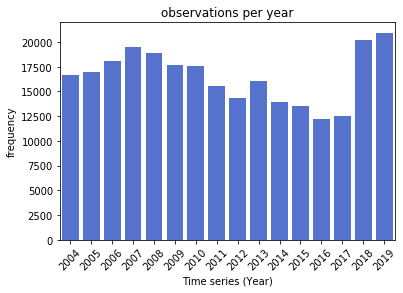

In [19]:
#Exploring Frequeny of delayed time per eah report on different days
#we dropped 2003 and 2020 from our plotting since they may be misunderstood for being less than 1 year
#we don't need to put data in order since dataseries matters with us
#We note that it was normal distribution, but in 2018 it increased suddenly
df_year=df[(df['year']!= 2003) & (df['year']!= 2020)]
sns.countplot(data=df_year, x='year', color='royalblue');
#plt.xlim(0,250)
plt.xlabel('Time series (Year)')
plt.xticks(rotation=45)
plt.ylabel('frequency')
plt.title('observations per year');

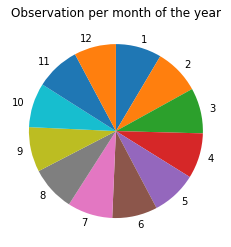

In [20]:
#Here we can find out that observations are not affected by the month of the year
#we used sort_index, so pie chart is ordered per month not count since is time series
plt.pie(df['month'].value_counts(), labels = df['month'].value_counts().sort_index().index,
        startangle=90, counterclock = False);
plt.title('Observation per month of the year');

**Q2:** \
If you are travelling to USA soon, What is the possbility that your flight is going to be delayed, given that you don't have not booked your Airline Plane yet? And what is the estimated average time of delay? \
***ANSWER:*** \
According to recent study, there is a possibility of 20% on average with around 10 minutes due to many different reasons.

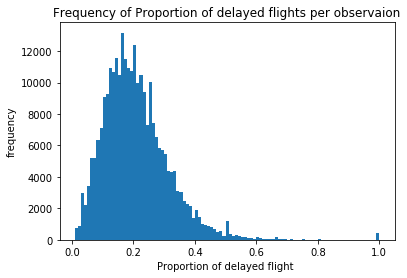

In [21]:
#Exploring Frequeny of delayed time per eah report on different days
bins = np.arange(0.01, 1.01,0.01)
df_freq = df.copy()
df_freq['delay_perc'] = df_freq['arr_del15']/df_freq['arr_flights']
plt.hist(data=df_freq, x='delay_perc', bins=bins);
#plt.xlim(0,250)
plt.xlabel('Proportion of delayed flight ')
plt.ylabel('frequency')
plt.title('Frequency of Proportion of delayed flights per observaion');

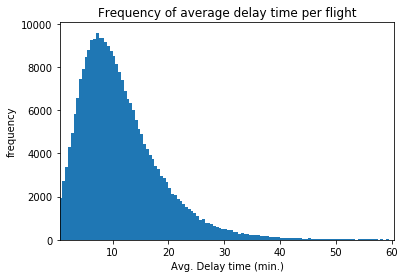

In [22]:
#Exploring Frequeny of average. delayed time per flight
bins = np.arange(0, 60, 0.5)
df_f = df.copy()
df_f['avg._delay_per_flight'] = (df_f['arr_delay']/df_f['arr_flights'])
plt.hist(data=df_f, x='avg._delay_per_flight',bins=bins);
plt.xlim(0.5,60.5)
plt.xlabel('Avg. Delay time (min.)')
plt.ylabel('frequency')
plt.title('Frequency of average delay time per flight');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There was unusual points in the distribution of observations through different year, but I don't need to perform transformation or ordering the data in descending way since It is a time series, and we need to show it as in its real order
> In the pie chart, we don't need to plot percentages, since we need it only as figurative, and it is not recommended usually to have pie chart with many variables, but I think it works well here

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> in the histogram distribution, I needed to make the data tidy, since I need to focus on the main variables and not the outliers since their frequencies are very low to occur

### Bivariate plots

**Q3:** \
If your flight was delayed, roughly what could the possible reason for the delay be? Also does the total duration of delay follows the same pattern? \
***ANSWER:*** \
According to the matrix plot, we can see that "security delays or weather delays" does not usually affect the total number of delayed filghts with a big conribution, also they don't usually happen, Controversly, we can see that "NAS due to navigation system errors or Later Aircraft due to late leave or arrival of a different plane" comes as the most possible reasos for delay, and later "carrier" services such as maintenance and crew issues come. \
We can clearly see that the same pattern follows up for the Duration of delay.

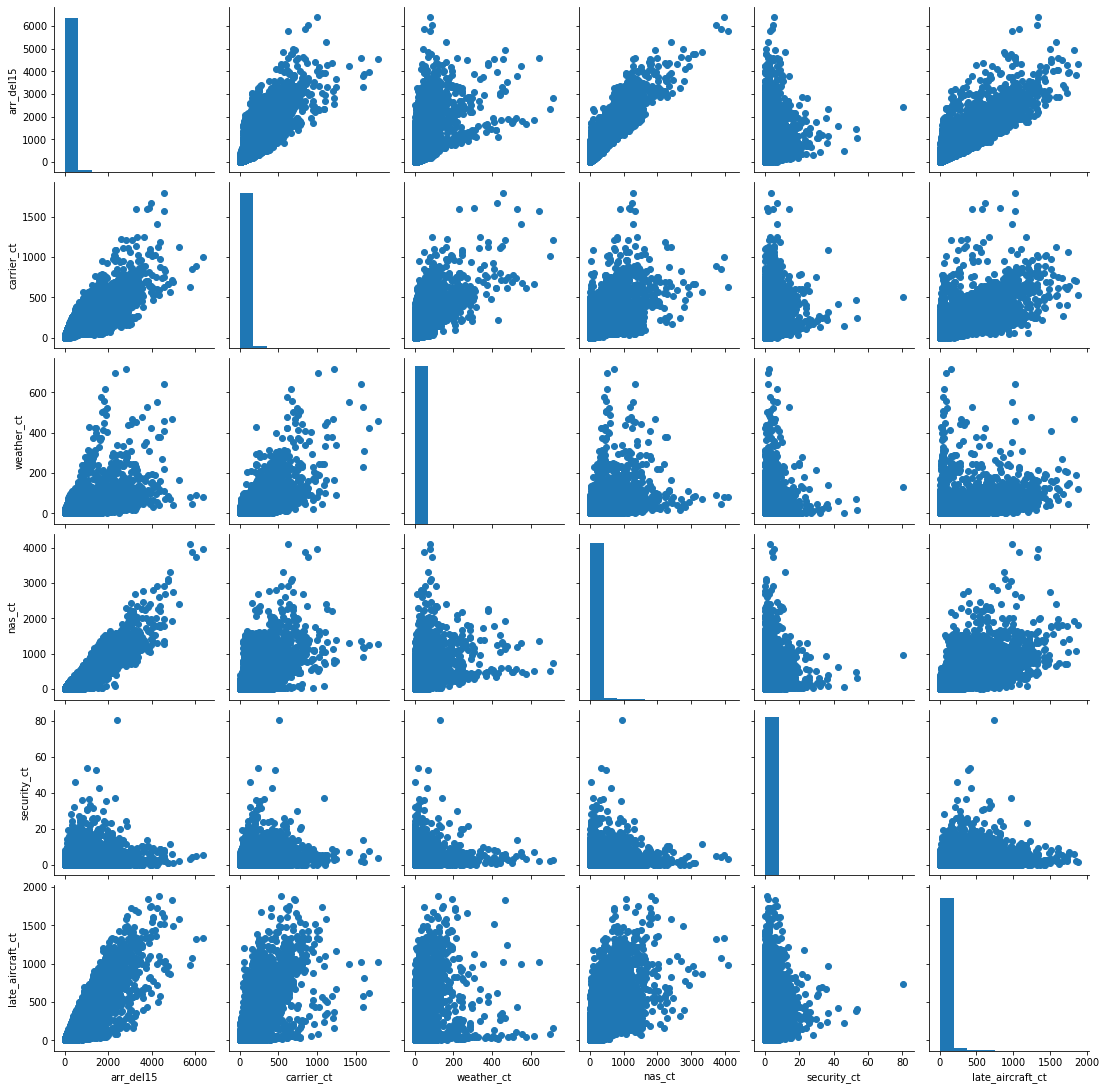

In [23]:
#Delay time data and variables
#we fin that it is clear that there is strong increasing relationship betwee delay time and all
#subcategories except with security whic needs further investigation that it is vertical relationship
Del_time = ['arr_del15','carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct']
g = sns.PairGrid(data=df, vars=Del_time)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

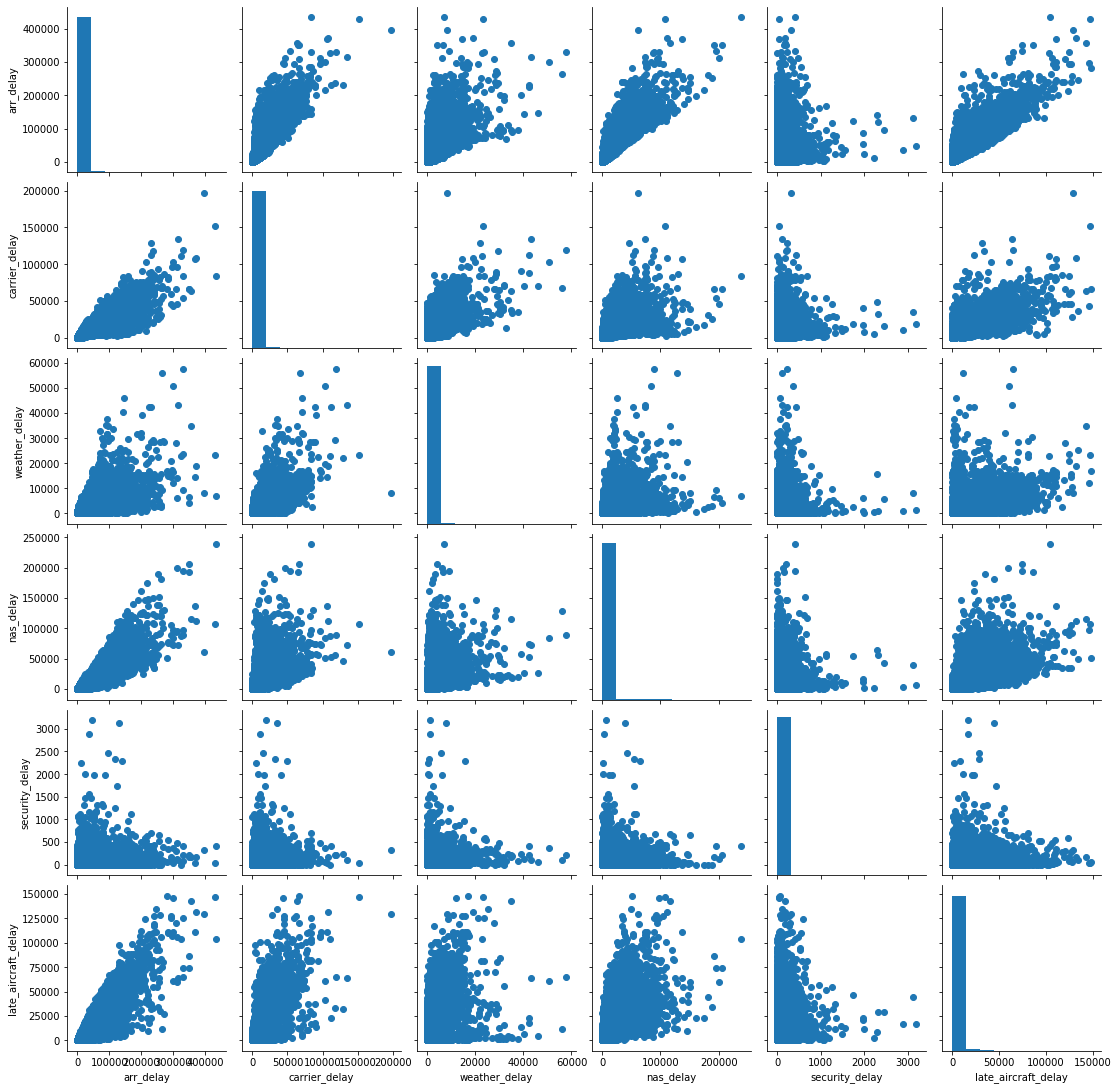

In [24]:
#Delayed flights Number data and variables
#this plot is similar to the above one which indicates that no. of delayed flights highly dependent
#on delated time 
Del_tot = ['arr_delay','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']
g = sns.PairGrid(data=df, vars=Del_tot)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

**Q4:** \
If you were to book your flight through a carrierID that has more than one Airline, Do you think that the sub-Airlines would have the same characteristics since they have the same superior carrierID? If not, can you elaporate the reasons?  \
***ANSWER:*** \
According to the heatmap plot, we can see that "possibility of delay" for sub-Airlines highly differ, which could be due to different delay conditions not the quality of Airlines itself. \
Yet by doing further investigation with multivariate and comparing the delays that are related only to the Airline itself such as delay due to maintenance..etc, we found clear reuslts which indicates that you should make your choice based on the Airline not only the carrier ID since some Airlines usually delay due to some issues with the Airline service itself

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


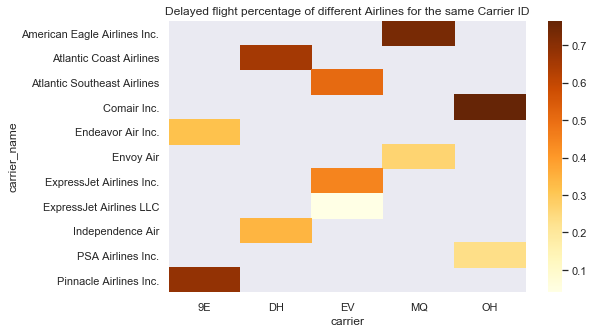

In [32]:
#exploring the relationship between delays of each Airlines under same Airline code

carr = ((df.groupby('carrier')['carrier_name'].nunique())>1).reset_index()
carr = carr[carr['carrier_name']==True]
carr_multi = ['9E','DH','EV','MQ','OH']
#find rows in main dataset with those values
df_carr_multi = df[df['carrier'].isin(carr_multi)]
df_carr_multi['Delay_to_Flights'] = df_carr_multi['arr_del15']/df_carr_multi['arr_flights']
#creating a pivot table, to plot clustered data
df_carr_multi = df_carr_multi.groupby(['carrier','carrier_name'])['Delay_to_Flights'].sum()
df_carr_multi = df_carr_multi.reset_index(name='Total_Delayed_Flights')
df_carr_multi = df_carr_multi.pivot(index='carrier_name',columns='carrier',values='Total_Delayed_Flights')
#converting data into percentage
for i in df_carr_multi.columns:
    df_carr_multi[i] = df_carr_multi[i]/df_carr_multi[i].sum()
#we can find out that for each carrier code, delay percentage depends on the type of the carrier
sns.heatmap(data=df_carr_multi, cmap='YlOrBr');
sns.set(rc={'figure.figsize':(8,5)});
plt.title('Delayed flight percentage of different Airlines for the same Carrier ID');
#we need further investigation to see if this delay is due to the carrier itself of other conditions

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


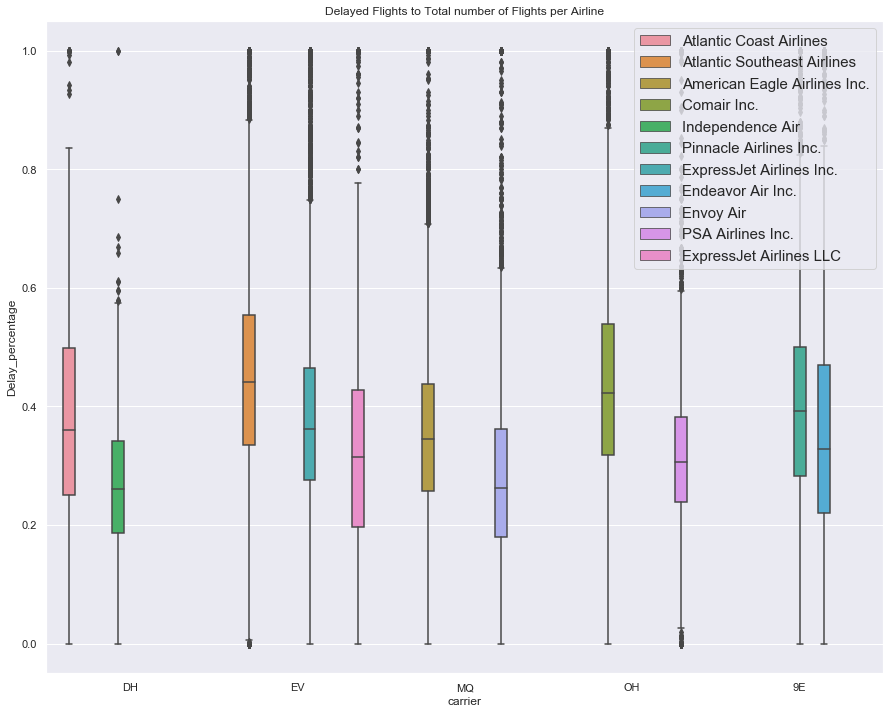

In [29]:
#we are now exploring the relationship between each carrier name of those previously mentioned and
#the total number of flights delayed due to Airlines issue such as maintenance
df_airlines = df_delay[df_delay['carrier'].isin(carr_multi)]
#Adding a new Engineering Feature
df_airlines['Delay_percentage'] = df_airlines['carrier_ct']/df_airlines['arr_del15']
sns.boxplot(data = df_airlines, x='carrier', y='Delay_percentage',hue='carrier_name')
sns.set(rc={'figure.figsize':(15,12)})
plt.title('Delayed Flights to Total number of Flights per Airline')
plt.legend(loc='upper right', prop={'size':15});
# We can find out that almost different Airlines for the same carrierID have the same percentage of 
#delay as per total number of flights, which makes our previous interpretation is not accurate since
#number of flights highly differs between airlines, so the higher the number fo flights the more
#delays occur, but the percentage still almost the same

**Q5:** \
which season of the year do you think that weather highly affects the flights delay? \
***ANSWER:*** \
According to the pointplot, we see that possibility of delay is very low in September, October and Novemeber, and it changes sinusoidally with the month, so Autumn is the season with the least possibility of delays due to weather.

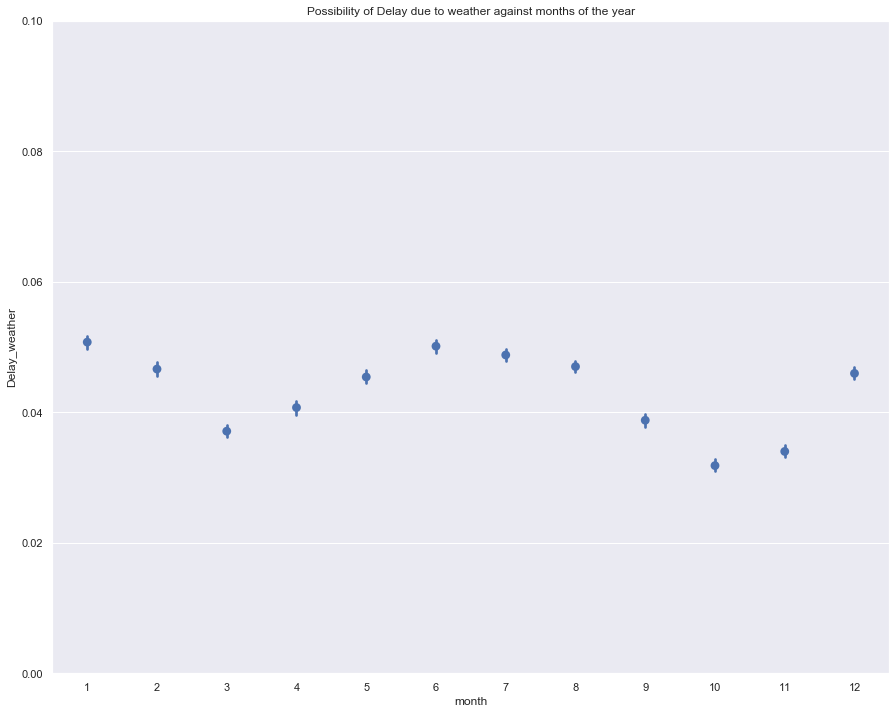

In [27]:
#exploring relationship between Month and weather delayed flights as ratio to total delay
df_weather_delay = df_delay.copy()
df_weather_delay['Delay_weather'] = df_weather_delay['weather_ct']/df_weather_delay['arr_del15']
sns.pointplot(data=df_weather_delay, x='month',y='Delay_weather', linestyles="");
#we find out that auto scale is misleading, so i change limits of Y axis
plt.ylim(0,0.1);
plt.title('Possibility of Delay due to weather against months of the year');
#we can conclude that your chance to get delayed due to weather is very low in months of March
#September,October and December

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> This part of explanation has been already mentioned in the form of question and answer prior to each plot.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes I have observed something when featuring 'Delayed flight percentage of different Airlines for the same Carrier ID', that's why I went into further investigation by applying multivariate investigation in the cell below it relating the observations to Delay percentage

### Multivariate plots

**Q6:** \
If you were to choose one of the previously mentioned carrierIDS that have subsets, Do they all have the same possibilites for delay rather than carrier characteristics?And illustrate the relationship between the most two affecting fators delayed duration on the total number of flights delayed.  \
***ANSWER:*** \
According to the scatterplot, we can say that they all are almost affected in similar criteria but EV and MQ carrierIDs are the most affected by delays due to NAS or later aircraft, when comparison is at scale of 500 flight delays per observation or more.

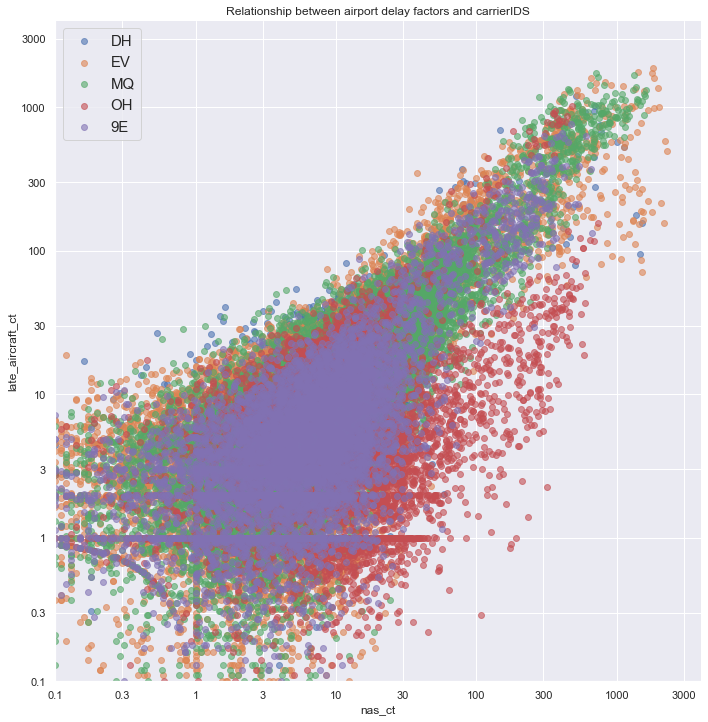

In [34]:
#Using FacetGrid plot for multivariates
g = sns.FacetGrid(data=df_airlines, hue='carrier', size=10 )
g.map(plt.scatter,'nas_ct','late_aircraft_ct', alpha=0.6)
plt.legend(prop={'size':15});
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1,4000)
plt.ylim(0.1,4000)
plt.title('Relationship between airport delay factors and carrierIDS');
plt.xticks([0.1,0.3,1,3,10,30,100,300,1000,3000],[0.1,0.3,1,3,10,30,100,300,1000,3000]);
plt.yticks([0.1,0.3,1,3,10,30,100,300,1000,3000],[0.1,0.3,1,3,10,30,100,300,1000,3000]);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I went into further investigation for carrierIDs with NAC and late aircraft Delays, and this strengthened the features of interest of subset Airlines. Also there is another Multivariate plot that is included in the previous section to tell more descriptive analaysis of same features of Airlines

### Were there any interesting or surprising interactions between features?

> Plots showed that Each Airline has dependency on carrier maintenance that causes delays, Also the above plot showed surprising results that only 2 types of Airlines that have many delayed flights per observation above value of 500.

### Unpolished Plot Example

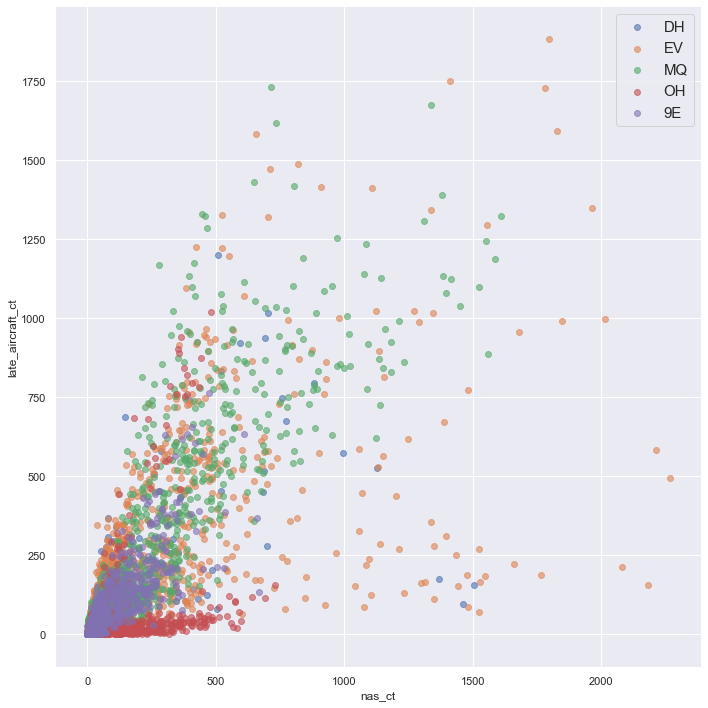

In [36]:
#Unpolished plot
g = sns.FacetGrid(data=df_airlines, hue='carrier', size=10 )
g.map(plt.scatter,'nas_ct','late_aircraft_ct', alpha=0.6)
plt.legend(prop={'size':15});

## Main Findings

1- The observations of this sample are representative of the population and reliable

2- According to recent study, there is a possibility of 20% on average with around 10 minutes delay due to many different reasons, if you were to book a random flight

3- "security delays or weather delays" does not usually affect the total number of delayed filghts with a big conribution, also they don't usually happen, Controversly, we can see that "NAS due to navigation system errors or Later Aircraft due to late leave or arrival of a different plane" comes as the most possible reasos for delay, and later "carrier" services such as maintenance and crew issues come.

4- For carrierIDs which has different subset airlines, we found clear reuslts which indicates that you should make your choice based on the Airline not only the carrier ID since some Airlines usually delay due to some issues with the Airline service itself

5- we see that possibility of delay is very low in Autumn, and it changes sinusoidally with the month.

6-we can say that carrierIDs are almost affected in similar criteria by delay reasons but EV and MQ carrierIDs are the most affected by delays due to NAS or later aircraft, when comparison is at scale of 500 flight delays per observation or more.

## Limitations

*There are some data that has negative values of delay, which is not logica, so we assumed them as zero delay

*There are some data that are missing, we neeglected them since they are no more than 0.2% and dropped them

*There are some data in which delay flights were zero, so we made a new dataframe that has only delayed flights so we can make our statistics only in delayed flights dataset

*There was unnamed column in the dataset, and some repeated columns such as airport abbreviation and name, so we dropped those unnecessary columns.

*Names of columns were not stripped, so this caused some problems in interpretaion till I stripped it.